In [343]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
import os
from uszipcode import SearchEngine
import plotly.express as px
import pickle as pk
import hvplot.pandas
import panel as pn
from panel.interact import interact
import plotly.express as px

In [344]:
mapbox_token = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(mapbox_token)

In [345]:
medianAskingRent_All_csv = Path("Data/realestate/medianAskingRent_All.csv")
zip_codes_areas_csv = Path("Data/realestate/zip_codes_nyc_with_areas.csv")
medianAskingRent_All_df = pd.read_csv(medianAskingRent_All_csv)
zip_codes_areas_df = pd.read_csv(zip_codes_areas_csv)

In [346]:
medianAskingRent_All_df.head(2)

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08
0,All Downtown,Manhattan,submarket,3200.0,3200.0,3025.0,3100.0,3100.0,3200.0,3195.0,...,3876.0,3800.0,3800.0,3883.0,3800.0,3950.0,4001.0,4095.0,4000.0,4000.0
1,All Midtown,Manhattan,submarket,2895.0,2800.0,2800.0,2850.0,2900.0,2950.0,3000.0,...,3510.0,3551.0,3500.0,3550.0,3550.0,3595.0,3650.0,3695.0,3750.0,3795.0


In [347]:
#Separating dataframes by NYC boroughs 

manhattan_rent_noarea_df = medianAskingRent_All_df.loc[medianAskingRent_All_df.Borough=='Manhattan']
bronx_rent_noarea_df = medianAskingRent_All_df.loc[medianAskingRent_All_df.Borough=='Bronx']
brooklyn_rent_noarea_df = medianAskingRent_All_df.loc[medianAskingRent_All_df.Borough=='Brooklyn']
queens_rent_noarea_df = medianAskingRent_All_df.loc[medianAskingRent_All_df.Borough=='Queens']
staten_island_rent_noarea_df = medianAskingRent_All_df.loc[medianAskingRent_All_df.Borough=='Staten Island']
manhattan_rent_noarea_df.reset_index(inplace=True)
bronx_rent_noarea_df.reset_index(inplace=True)
brooklyn_rent_noarea_df.reset_index(inplace=True)
queens_rent_noarea_df.reset_index(inplace=True)
staten_island_rent_noarea_df.reset_index(inplace=True)
manhattan_rent_noarea_df.drop(columns=['index'],inplace=True)
bronx_rent_noarea_df.drop(columns=['index'],inplace=True)
brooklyn_rent_noarea_df.drop(columns=['index'],inplace=True)
queens_rent_noarea_df.drop(columns=['index'],inplace=True)
staten_island_rent_noarea_df.drop(columns=['index'],inplace=True)

In [348]:
#Lists of different NYC neighborhoods from boroughs dataframes

manhattan_neighborhoods_df = manhattan_rent_noarea_df['areaName']
manhattan_neighborhoods = manhattan_neighborhoods_df.tolist()

bronx_neighborhoods_df = bronx_rent_noarea_df['areaName']
bronx_neighborhoods = bronx_neighborhoods_df.tolist()

brooklyn_neighborhoods_df = brooklyn_rent_noarea_df['areaName']
brooklyn_neighborhoods = brooklyn_neighborhoods_df.tolist()

queens_neighborhoods_df = queens_rent_noarea_df['areaName']
queens_neighborhoods = queens_neighborhoods_df.tolist()

staten_island_neighborhoods_df = staten_island_rent_noarea_df['areaName']
staten_island_neighborhoods = staten_island_neighborhoods_df.tolist()

In [349]:
#creation of list of areas, empty list that is filled by a conditional statement were each neighborhood in the neighborhood list is assigned to a NYC 
#area

manhattan_areas = []
for name in manhattan_neighborhoods:
    if name == 'Inwood':
        manhattan_areas.append('Inwood-Washington-Heights')
    elif name == 'Washington Heights':
        manhattan_areas.append('Inwood-Washington-Heights')
    elif name == 'Hamilton Heights':
        manhattan_areas.append('Inwood-Washington-Heights')
    elif name == 'Upper West Side':
        manhattan_areas.append('Upper_West_Side')
    elif name == 'All Upper West Side':
        manhattan_areas.append('Upper_West_Side')
    elif name == 'Upper East Side':
        manhattan_areas.append('Upper_East_Side')
    elif name == 'Roosevelt Island':
        manhattan_areas.append('Upper_East_Side')
    elif name == 'All Upper East Side':
        manhattan_areas.append('Upper_East_Side')
    elif name == 'Midtown':
        manhattan_areas.append('Midtown')
    elif name == 'Midtown East':
        manhattan_areas.append('Midtown_East')
    elif name == 'Chelsea':
        manhattan_areas.append('Chelsea')
    elif name == 'Midtown West':
        manhattan_areas.append('Clinton')
    elif name == 'Central Park South':
        manhattan_areas.append('Central_Park_South')
    elif name == 'All Upper Manhattan':
        manhattan_areas.append('Midtown')
    elif name == 'Manhattan':
        manhattan_areas.append('Midtown')
    elif name == 'Soho':
        manhattan_areas.append('Greenwich-Village_Soho')
    elif name == 'Greenwich Village':
        manhattan_areas.append('Greenwich-Village_Soho')
    elif name == 'Tribeca':
        manhattan_areas.append('Tribeca')
    elif name == 'West Village':
        manhattan_areas.append('Greenwich-Village_Soho')
    elif name == 'East Harlem':
        manhattan_areas.append('East_Harlem')
    elif name == 'West Harlem':
        manhattan_areas.append('Central_Harlem')
    elif name == 'Central Harlem':
        manhattan_areas.append('Central_Harlem')
    elif name == 'Morningside Heights':
        manhattan_areas.append('Central_Harlem')
    elif name == 'Midtown South':
        manhattan_areas.append('Gramercy-Park_Murray-Hill')
    elif name == 'Gramercy Park':
        manhattan_areas.append('Gramercy-Park_Murray-Hill')
    elif name == 'Flatiron':
        manhattan_areas.append('Gramercy-Park_Murray-Hill')
    elif name == 'Marble Hill':
        manhattan_areas.append('Kingsbridge_Riverdale')
    elif name == 'Little Italy':
        manhattan_areas.append('Lower_East_Side')
    elif name == 'Nolita':
        manhattan_areas.append('Lower_East_Side')
    elif name == 'Lower East Side':
        manhattan_areas.append('Lower_East_Side')
    elif name == 'Stuyvesant Town/PCV':
        manhattan_areas.append('Lower_East_Side')
    elif name == 'Chinatown':
        manhattan_areas.append('Lower_East_Side')
    elif name == 'East Village':
        manhattan_areas.append('Lower_East_Side')
    elif name == 'Financial District':
        manhattan_areas.append('Lower_Manhattan')
    elif name == 'Civic Center':
        manhattan_areas.append('Lower_Manhattan')
    elif name == 'All Downtown':
        manhattan_areas.append('Lower_Manhattan')
    elif name == 'Battery Park City':
        manhattan_areas.append('Battery_Park_City')
    else:
        manhattan_areas.append('Midtown')
        

In [350]:
#BRONX AREAS 

bronx_areas = []
for name in bronx_neighborhoods:
    if name == 'Parkchester':
        bronx_areas.append('Southeast_Bronx')
    elif name == 'Castle Hill':
        bronx_areas.append('Southeast_Bronx')
    elif name == 'Pelham Bay':
        bronx_areas.append('Southeast_Bronx')
    elif name == 'Schuylerville':
        bronx_areas.append('Southeast_Bronx')
    elif name == 'Throgs Neck':
        bronx_areas.append('Southeast_Bronx')
    elif name == 'Van Nest':
        bronx_areas.append('Southeast_Bronx')
    elif name == 'Westchester Village':
        bronx_areas.append('Southeast_Bronx')
    elif name == 'Bronxwood':
        bronx_areas.append('Northeast_Bronx')
    elif name == 'Baychester':
        bronx_areas.append('Northeast_Bronx')
    elif name == 'Edenwald':
        bronx_areas.append('Northeast_Bronx') 
    elif name == 'Pelham Gardens':
        bronx_areas.append('Northeast_Bronx')  
    elif name == 'Pelham Parkway':
        bronx_areas.append('Northeast_Bronx')
    elif name == 'Williamsbridge':
        bronx_areas.append('Northeast_Bronx')  
    elif name == 'Eastchester':
        bronx_areas.append('Northeast_Bronx')    
    elif name == 'Co-op City':
        bronx_areas.append('Northeast_Bronx')    
    elif name == 'Laconia':
        bronx_areas.append('Northeast_Bronx') 
    elif name == 'City Island':
        bronx_areas.append('Northeast_Bronx') 
    elif name == 'Wakefield':
        bronx_areas.append('Northeast_Bronx')
    elif name == 'Kingsbridge':
        bronx_areas.append('Kingsbridge_Riverdale')
    elif name == 'Riverdale':
        bronx_areas.append('Kingsbridge_Riverdale')
    elif name == 'Hunts Point':
        bronx_areas.append('Hunts-Point_Mott-Haven')
    elif name == 'Mott Haven':
        bronx_areas.append('Hunts-Point_Mott-Haven')
    elif name == 'Morrisania':
        bronx_areas.append('High-Bridge_Morrisania')
    elif name == 'Highbridge':
        bronx_areas.append('High-Bridge_Morrisania')
    elif name == 'Morrisania':
        bronx_areas.append('High-Bridge_Morrisania')
    elif name == 'Highbridge':
        bronx_areas.append('High-Bridge_Morrisania')
    elif name == 'Bedford Park':
        bronx_areas.append('Bronx-Park_Fordham')
    elif name == 'Fordham':
        bronx_areas.append('Bronx-Park_Fordham')
    elif name == 'Belmont':
        bronx_areas.append('Belmont')
    else:
        bronx_areas.append('Central_Bronx')
        

In [351]:
#BROOKLYN AREAS

brooklyn_areas = []
for name in brooklyn_neighborhoods:
    if name == 'Bushwick':
        brooklyn_areas.append('Bushwick')
    elif name == 'Williamsburg':
        brooklyn_areas.append('Williamsburg')
    elif name == 'Sunset Park':
        brooklyn_areas.append('Sunset_Park')
    elif name == 'Greenpoint':
        brooklyn_areas.append('Greenpoint')
    elif name == 'East New York':
        brooklyn_areas.append('East_New_York-New_Lots')
    elif name == 'Flatbush':
        brooklyn_areas.append('Flatbush')
    elif name == 'East Flatbush':
        brooklyn_areas.append('Flatbush')
    elif name == 'DUMBO':
        brooklyn_areas.append('DUMBO-Brooklyn_Heights')
    elif name == 'Gowanus':
        brooklyn_areas.append('Red_Hook-Gowanus')
    elif name == 'North Brooklyn':
        brooklyn_areas.append('Northwest_Brooklyn')
    elif name == 'Northwest Brooklyn':
        brooklyn_areas.append('Northwest_Brooklyn')
    elif name == 'Columbia St Waterfront District':
        brooklyn_areas.append('Northwest_Brooklyn')
    elif name == 'Boerum Hill':
        brooklyn_areas.append('Northwest_Brooklyn')
    elif name == 'Bedford-Stuyvesant':
        brooklyn_areas.append('Northwest_Brooklyn')
    elif name == 'Brooklyn Heights':
        brooklyn_areas.append('DUMBO-Brooklyn_Heights')
    elif name == 'Prospect Heights':
        brooklyn_areas.append('Prospect_Heights')
    elif name == 'Fort Greene':
        brooklyn_areas.append('Northwest_Brooklyn')
    elif name == 'Red Hook':
        brooklyn_areas.append('Red_Hook-Gowanus')
    elif name == 'Park Slope':
        brooklyn_areas.append('Park_Slope')
    elif name == 'Carroll Gardens':
        brooklyn_areas.append('Northwest_Brooklyn')
    elif name == 'Clinton Hill':
        brooklyn_areas.append('Northwest_Brooklyn')
    elif name == 'Cobble Hill':
        brooklyn_areas.append('Cobble_Hill')
    elif name == 'Downtown Brooklyn':
        brooklyn_areas.append('Northwest_Brooklyn')
    elif name == 'Coney Island':
        brooklyn_areas.append('Southern_Brooklyn')
    elif name == 'South Brooklyn':
        brooklyn_areas.append('Southern_Brooklyn')
    elif name == 'Bergen Beach':
        brooklyn_areas.append('Southern_Brooklyn')
    elif name == 'Gerritsen Beach':
        brooklyn_areas.append('Southern_Brooklyn')
    elif name == 'Gravesend':
        brooklyn_areas.append('Southern_Brooklyn')
    elif name == 'Bath Beach':
        brooklyn_areas.append('Southern_Brooklyn')
    elif name == 'Marine Park':
        brooklyn_areas.append('Southern_Brooklyn')
    elif name == 'Brighton Beach':
        brooklyn_areas.append('Southern_Brooklyn')
    elif name == 'Mill Basin':
        brooklyn_areas.append('Southern_Brooklyn')
    elif name == 'Old Mill Basin':
        brooklyn_areas.append('Southern_Brooklyn')
    elif name == 'Manhattan Beach':
        brooklyn_areas.append('Southern_Brooklyn')
    elif name == 'Sheepshead Bay':
        brooklyn_areas.append('Southern_Brooklyn')
    elif name == 'Seagate':
        brooklyn_areas.append('Southern_Brooklyn')
    elif name == 'Canarsie':
        brooklyn_areas.append('Canarsie_Flatlands')
    elif name == 'East Brooklyn':
        brooklyn_areas.append('Canarsie_Flatlands')
    elif name == 'Brownsville':
        brooklyn_areas.append('Canarsie_Flatlands')
    elif name == 'Flatlands':
        brooklyn_areas.append('Canarsie_Flatlands')
    elif name == 'Borough Park':
        brooklyn_areas.append('Borough_Park')
    elif name == 'Bay Ridge':
        brooklyn_areas.append('Southwest_Brooklyn')
    elif name == 'Bensonhurst':
        brooklyn_areas.append('Southwest_Brooklyn')
    elif name == 'Dyker Heights':
        brooklyn_areas.append('Southwest_Brooklyn')
    elif name == 'Crown Heights':
        brooklyn_areas.append('Central_Brooklyn')
    elif name == 'Prospect Park':
        brooklyn_areas.append('Central_Brooklyn')
    elif name == 'Greenwood':
        brooklyn_areas.append('Central_Brooklyn')
    elif name == 'Prospect Lefferts Gardens':
        brooklyn_areas.append('Central_Brooklyn')
    elif name == 'Prospect Park South':
        brooklyn_areas.append('Central_Brooklyn')
    elif name == 'Windsor Terrace':
        brooklyn_areas.append('Central_Brooklyn')
    elif name == 'Kensington':
        brooklyn_areas.append('Central_Brooklyn')
    elif name == 'Midwood':
        brooklyn_areas.append('Central_Brooklyn')
    elif name == 'Ocean Parkway':
        brooklyn_areas.append('Central_Brooklyn')
    elif name == 'Ditmas Park':
        brooklyn_areas.append('Central_Brooklyn')
    else: 
        brooklyn_areas.append('Central_Brooklyn') 
        

In [352]:
#QUEENS AREAS

queens_areas = []
for name in queens_neighborhoods:
    if name == 'Bayside':
        queens_areas.append('North_Queens')
    elif name == 'Oakland Gardens':
        queens_areas.append('Northeast_Queens')
    elif name == 'Bellerose':
        queens_areas.append('Northeast_Queens')
    elif name == 'Northeast Queens':
        queens_areas.append('Northeast_Queens')
    elif name == 'College Point':
        queens_areas.append('Northeast_Queens')
    elif name == 'Douglaston':
        queens_areas.append('Northeast_Queens')
    elif name == 'Little Neck':
        queens_areas.append('Northeast_Queens')
    elif name == 'Flushing':
        queens_areas.append('North_Queens')
    elif name == 'Clearview':
        queens_areas.append('North_Queens')
    elif name == 'Auburndale':
        queens_areas.append('Northeast_Queens')
    elif name == 'Kew Gardens Hills':
        queens_areas.append('Northeast_Queens')
    elif name == 'Pomonok':
        queens_areas.append('Northeast_Queens')
    elif name == 'Floral Park':
        queens_areas.append('Northeast_Queens')
    elif name == 'Fresh Meadows':
        queens_areas.append('Northeast_Queens')
    elif name == 'Hillcrest':
        queens_areas.append('Northeast_Queens')
    elif name == 'Utopia':
        queens_areas.append('Northeast_Queens')
    elif name == 'Glen Oaks':
        queens_areas.append('Northeast_Queens')
    elif name == 'Whitestone':
        queens_areas.append('Northeast_Queens')
    elif name == 'Queens':
        queens_areas.append('Northeast_Queens')
    elif name == 'Corona':
        queens_areas.append('Central_Queens')
    elif name == 'North Corona':
        queens_areas.append('Central_Queens')
    elif name == 'East Elmhurst':
        queens_areas.append('West_Queens')
    elif name == 'Elmhurst':
        queens_areas.append('Central_Queens')
    elif name == 'Forest Hills':
        queens_areas.append('Central_Queens')
    elif name == 'Glendale':
        queens_areas.append('Central_Queens')
    elif name == 'Jackson Heights':
        queens_areas.append('West_Queens')
    elif name == 'Maspeth':
        queens_areas.append('Central_Queens')
    elif name == 'Rego Park':
        queens_areas.append('Central_Queens')
    elif name == 'Ridgewood':
        queens_areas.append('Ridgewood')
    elif name == 'Woodside':
        queens_areas.append('Central_Queens')
    elif name == 'Central Queens':
        queens_areas.append('Central_Queens')
    elif name == 'South Jamaica':
        queens_areas.append('Jamaica')
    elif name == 'Jamaica Hills':
        queens_areas.append('Jamaica')
    elif name == 'Jamaica':
        queens_areas.append('Jamaica')
    elif name == 'Jamaica Estates':
        queens_areas.append('Jamaica')
    elif name == 'Astoria':
        queens_areas.append('Astoria')
    elif name == 'Long Island City':
        queens_areas.append('Long_Island_City')
    elif name == 'Northwest Queens':
        queens_areas.append('Northwest_Queens')
    elif name == 'Sunnyside':
        queens_areas.append('Northwest_Queens')
    elif name == 'Richmond Hill':
        queens_areas.append('West_Central_Queens')
    elif name == 'Middle Village':
        queens_areas.append('West_Central_Queens')
    elif name == 'Briarwood':
        queens_areas.append('West_Central_Queens')
    elif name == 'Kew Gardens':
        queens_areas.append('West_Central_Queens')
    elif name == 'The Rockaways':
        queens_areas.append('Rockaways')
    elif name == 'Rockaway All':
        queens_areas.append('Rockaways')
    elif name == 'Brookville':
        queens_areas.append('Southeast_Queens')
    elif name == 'Cambria Heights':
        queens_areas.append('Southeast_Queens')
    elif name == 'Hollis':
        queens_areas.append('Southeast_Queens')
    elif name == 'Laurelton':
        queens_areas.append('Southeast_Queens')
    elif name == 'Queens Village':
        queens_areas.append('Southeast_Queens')
    elif name == 'Queens Village':
        queens_areas.append('Southeast_Queens')
    elif name == 'Rosedale':
        queens_areas.append('Southeast_Queens')
    elif name == 'St. Albans':
        queens_areas.append('Southeast_Queens')
    elif name == 'Springfield Gardens':
        queens_areas.append('Southeast_Queens')
    elif name == 'South Queens':
        queens_areas.append('Southeast_Queens')
    elif name == 'New Hyde Park':
        queens_areas.append('Southeast_Queens')
    elif name == 'Howard Beach':
        queens_areas.append('Southwest_Queens')
    elif name == 'Ozone Park':
        queens_areas.append('Southwest_Queens')
    elif name == 'South Ozone Park':
        queens_areas.append('Southwest_Queens')
    elif name == 'South Richmond Hill':
        queens_areas.append('Southwest_Queens')
    else: 
        queens_areas.append('Southwest_Queens')
        

In [353]:
#STATEN ISLAND AREAS

staten_island_areas = []
for name in staten_island_neighborhoods:
    if name == 'Staten Island':
        staten_island_areas.append('Staten_Island')
    else: 
        staten_island_areas.append('Staten_Island')
        

In [354]:
#TURN LISTS OF AREAS PER BOROUGH INTO DATA FRAMES

manhattan_areas_df = pd.DataFrame(manhattan_areas)
bronx_areas_df = pd.DataFrame(bronx_areas)
brooklyn_areas_df = pd.DataFrame(brooklyn_areas)
queens_areas_df = pd.DataFrame(queens_areas)
staten_island_areas_df = pd.DataFrame(staten_island_areas)

manhattan_areas_df.rename(columns={0: "area"},inplace=True)
bronx_areas_df.rename(columns={0: "area"},inplace=True)
brooklyn_areas_df.rename(columns={0: "area"},inplace=True)
queens_areas_df.rename(columns={0: "area"},inplace=True)
staten_island_areas_df.rename(columns={0: "area"},inplace=True)


In [355]:
#CONCAT EACH AREA DATA FRAME WITH CORRESPONDING RENTS DATAFRAME

manhattan_rents_df = pd.concat([manhattan_areas_df,manhattan_rent_noarea_df],axis=1,sort=False)
bronx_rents_df = pd.concat([bronx_areas_df,bronx_rent_noarea_df],axis=1,sort=False)
brooklyn_rents_df = pd.concat([brooklyn_areas_df,brooklyn_rent_noarea_df],axis=1,sort=False)
queens_rents_df = pd.concat([queens_areas_df,queens_rent_noarea_df],axis=1,sort=False)
staten_island_rents_df = pd.concat([staten_island_areas_df,staten_island_rent_noarea_df],axis=1,sort=False)


In [356]:
manhattan_rents_by_neighborhood = manhattan_rents_df.groupby('areaName').mean()
manhattan_rents_neighborhood = manhattan_rents_by_neighborhood[['2019-08']].copy()
manhattan_rents_neighborhood.sort_values(by='2019-08', ascending=False,inplace=True)
manhattan_rents_neighborhood.reset_index(inplace = True)

brooklyn_rents_by_neighborhood = brooklyn_rents_df.groupby('areaName').mean()
brooklyn_rents_neighborhood = brooklyn_rents_by_neighborhood[['2019-08']].copy()
brooklyn_rents_neighborhood.sort_values(by='2019-08', ascending=False,inplace=True)
brooklyn_rents_neighborhood.reset_index(inplace = True)

queens_rents_by_neighborhood = queens_rents_df.groupby('areaName').mean()
queens_rents_neighborhood = queens_rents_by_neighborhood[['2019-08']].copy()
queens_rents_neighborhood.sort_values(by='2019-08', ascending=False,inplace=True)
queens_rents_neighborhood.reset_index(inplace = True)

bronx_rents_by_neighborhood = bronx_rents_df.groupby('areaName').mean()
bronx_rents_neighborhood = bronx_rents_by_neighborhood[['2019-08']].copy()
bronx_rents_neighborhood.sort_values(by='2019-08', ascending=False,inplace=True)
bronx_rents_neighborhood.reset_index(inplace = True)

staten_island_rents_by_neighborhood = staten_island_rents_df.groupby('areaName').mean()
staten_island_rents_neighborhood = staten_island_rents_by_neighborhood[['2019-08']].copy()
staten_island_rents_neighborhood.sort_values(by='2019-08', ascending=False,inplace=True)
staten_island_rents_neighborhood.reset_index(inplace = True)

In [357]:
bar_plot_manhattan_streeteasy = px.bar(
    manhattan_rents_neighborhood, x="areaName", y="2019-08", title="Manhattan average rent by neighborhood from StreetEasy data"
)

bar_plot_bronx_streeteasy = px.bar(
    bronx_rents_neighborhood, x="areaName", y="2019-08", title="Bronx average rent by neighborhood from StreetEasy data"
)

bar_plot_brooklyn_streeteasy = px.bar(
    brooklyn_rents_neighborhood, x="areaName", y="2019-08", title="Brooklyn average rent by neighborhood from StreetEasy data"
)

bar_plot_queens_streeteasy = px.bar(
    queens_rents_neighborhood, x="areaName", y="2019-08", title="Queens average rent by neighborhood from StreetEasy data"
)

bar_plot_staten_island_streeteasy = px.bar(
    staten_island_rents_neighborhood, x="areaName", y="2019-08", title="Staten island average rent by neighborhood from StreetEasy data"
)

In [358]:
row_streeteasy = pn.Row(bar_plot_manhattan_streeteasy,bar_plot_bronx_streeteasy,bar_plot_brooklyn_streeteasy,bar_plot_queens_streeteasy,bar_plot_staten_island_streeteasy)
row_streeteasy

Row
    [0] Plotly(Figure)
    [1] Plotly(Figure)
    [2] Plotly(Figure)
    [3] Plotly(Figure)
    [4] Plotly(Figure)

In [359]:
#MERGE ALL DATA FRAMES INTO ONE SINGLE DATA FRAME

new_york_rents_df = pd.concat([manhattan_rents_df,bronx_rents_df,brooklyn_rents_df,queens_rents_df,staten_island_rents_df],axis=0)
new_york_rents_consolidated_df = new_york_rents_df.groupby('area').mean()


In [360]:
new_york_rents_consolidated_df.head()

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08
area,,,,,,,,,,,,,,,,,,,,,
Astoria,1600.0,1650.0,1620.0,1600.0,1700.0,1700.0,1600.0,1600.0,1600.0,1700.0,...,2150.0,2150.0,2195.0,2200.0,2200.0,2200.0,2250.0,2300.0,2350.0,2350.0
Battery_Park_City,3495.0,3346.0,3268.0,3295.0,3100.0,3395.0,3200.0,3225.0,3360.0,3415.0,...,4500.0,4365.0,4465.0,4500.0,4320.0,4495.0,4960.0,5275.0,5300.0,4798.0
Belmont,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1813.0,1725.0,1998.0,2200.0,2225.0,1850.0,1938.0,1850.0,2000.0,2400.0
Borough_Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1875.0,1700.0,1850.0,1875.0,1885.0,1900.0,1885.0,1875.0,1900.0,1995.0
Bronx-Park_Fordham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1635.5,1771.5,1812.5,1735.0,1674.0,1625.0,1702.5,1797.5,1761.5,1762.5


In [361]:
#Dataframe of zip codes its corresponding NYC Areas

zip_codes_areas_df.head()

,zip_code,area
0,10453,Central Bronx
1,10457,Belmont
2,10460,Belmont
3,10458,Belmont
4,10467,Bronx-Park_Fordham


In [362]:
#list of zipcodes from zipcodes dataframe

zip_codes_areas_df.rename(columns={"zip_code": "zipcode"},inplace=True)
zip_codes_list = zip_codes_areas_df['zipcode'].tolist()

neighborhood_list = zip_codes_areas_df['area'].tolist()

In [363]:
#average values of rents per area from data

manhattan_rents_df_consolidated = manhattan_rents_df.groupby('area').mean()
bronx_rents_df_consolidated = bronx_rents_df.groupby('area').mean()
brooklyn_rents_df_consolidated = brooklyn_rents_df.groupby('area').mean()
queens_rents_df_consolidated = queens_rents_df.groupby('area').mean()
staten_island_rents_df_consolidated = staten_island_rents_df.groupby('area').mean()

In [364]:
#NEW DATAFRAMES JUST WITH LAST RENT PRICES RECORDED IN DATA

manhattan_rent_last_df = manhattan_rents_df_consolidated[['2019-08']].copy()
bronx_rent_last_df = bronx_rents_df_consolidated[['2019-08']].copy()
brooklyn_rent_last_df = brooklyn_rents_df_consolidated[['2019-08']].copy()
queens_rent_last_df = queens_rents_df_consolidated[['2019-08']].copy()
staten_island_rent_last_df = staten_island_rents_df_consolidated[['2019-08']].copy()
new_york_rents_last_df = new_york_rents_consolidated_df[['2019-08']].copy()

manhattan_rent_last_df.sort_values(by='2019-08', ascending=False,inplace=True)
bronx_rent_last_df.sort_values(by='2019-08', ascending=False,inplace=True)
brooklyn_rent_last_df.sort_values(by='2019-08', ascending=False,inplace=True)
queens_rent_last_df.sort_values(by='2019-08', ascending=False,inplace=True)
staten_island_rent_last_df.sort_values(by='2019-08', ascending=False,inplace=True)
new_york_rents_last_df.sort_values(by='2019-08', ascending=False,inplace=True)

manhattan_rent_last_df.reset_index(inplace = True)
bronx_rent_last_df.reset_index(inplace = True)
brooklyn_rent_last_df.reset_index(inplace = True)
queens_rent_last_df.reset_index(inplace = True)
staten_island_rent_last_df.reset_index(inplace = True)

manhattan_rent_last_df.rename(columns={"2019-08": "average_rent"},inplace=True)
bronx_rent_last_df.rename(columns={"2019-08": "average_rent"},inplace=True)
brooklyn_rent_last_df.rename(columns={"2019-08": "average_rent"},inplace=True)
queens_rent_last_df.rename(columns={"2019-08": "average_rent"},inplace=True)
staten_island_rent_last_df.rename(columns={"2019-08": "average_rent"},inplace=True)

In [365]:
bar_plot_manhattan_streeteasy_mod = px.bar(
    manhattan_rent_last_df, x="area", y="average_rent", title="Manhattan average rent by neighborhood from StreetEasy data"
)

bar_plot_bronx_streeteasy_mod = px.bar(
    bronx_rent_last_df, x="area", y="average_rent", title="Bronx average rent by neighborhood from StreetEasy data"
)

bar_plot_brooklyn_streeteasy_mod = px.bar(
    brooklyn_rent_last_df, x="area", y="average_rent", title="Brooklyn average rent by neighborhood from StreetEasy data"
)

bar_plot_queens_streeteasy_mod = px.bar(
    queens_rent_last_df, x="area", y="average_rent", title="Queens average rent by neighborhood from StreetEasy data"
)

bar_plot_staten_island_streeteasy_mod = px.bar(
    staten_island_rent_last_df, x="area", y="average_rent", title="Staten island average rent by neighborhood from StreetEasy data"
)

In [366]:
row_streeteasy_mod = pn.Row(bar_plot_manhattan_streeteasy_mod,bar_plot_bronx_streeteasy_mod,bar_plot_brooklyn_streeteasy_mod,bar_plot_queens_streeteasy_mod,bar_plot_staten_island_streeteasy_mod)
row_streeteasy_mod

Row
    [0] Plotly(Figure)
    [1] Plotly(Figure)
    [2] Plotly(Figure)
    [3] Plotly(Figure)
    [4] Plotly(Figure)

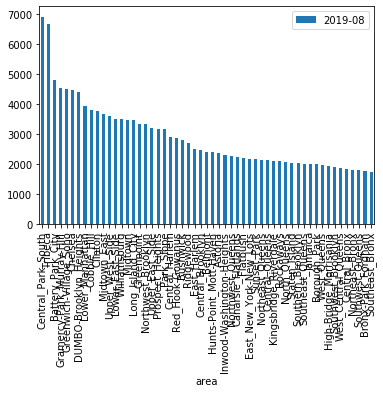

In [367]:
new_york_rents_last_df.plot.bar()


In [368]:
#Areas and zipcodes dataframe to dictionary

new_york_rent_last_dict_aux = new_york_rents_last_df[['2019-08']].to_dict()
new_york_rent_last_dict = new_york_rent_last_dict_aux['2019-08']

In [369]:
new_york_rent_last_dict

{'Central_Park_South': 6900.0,
 'Tribeca': 6673.0,
 'Battery_Park_City': 4798.0,
 'Gramercy-Park_Murray-Hill': 4523.333333333333,
 'Greenwich-Village_Soho': 4489.0,
 'Chelsea': 4462.0,
 'DUMBO-Brooklyn_Heights': 4410.0,
 'Lower_Manhattan': 3920.0,
 'Cobble_Hill': 3800.0,
 'Clinton': 3750.0,
 'Midtown_East': 3650.0,
 'Upper_West_Side': 3600.0,
 'Lower_East_Side': 3506.8333333333335,
 'Williamsburg': 3485.0,
 'Midtown': 3452.0,
 'Long_Island_City': 3450.0,
 'Greenpoint': 3318.0,
 'Northwest_Brooklyn': 3315.8888888888887,
 'Upper_East_Side': 3183.3333333333335,
 'Prospect_Heights': 3150.0,
 'Park_Slope': 3150.0,
 'Central_Harlem': 2881.3333333333335,
 'Red_Hook-Gowanus': 2850.0,
 'Bushwick': 2800.0,
 'Ridgewood': 2700.0,
 'East_Harlem': 2499.0,
 'Central_Brooklyn': 2475.0,
 'Belmont': 2400.0,
 'Hunts-Point_Mott-Haven': 2383.0,
 'Astoria': 2350.0,
 'Inwood-Washington-Heights': 2291.6666666666665,
 'Northwest_Queens': 2275.0,
 'Canarsie_Flatlands': 2246.0,
 'Flatbush': 2197.0,
 'East_New_Yo

In [370]:
#zipcodes-areas dataframe to dictionary 

zip_codes_areas_df.set_index('zipcode',inplace=True)
zip_codes_areas_dict_aux = zip_codes_areas_df.to_dict()
zip_codes_areas_dict = zip_codes_areas_dict_aux['area']

In [371]:
zip_codes_areas_dict

{10453: 'Central Bronx',
 10457: 'Belmont',
 10460: 'Belmont',
 10458: 'Belmont',
 10467: 'Bronx-Park_Fordham',
 10468: 'Bronx-Park_Fordham',
 10451: 'High-Bridge_Morrisania',
 10452: 'High-Bridge_Morrisania',
 10456: 'High-Bridge_Morrisania',
 10454: 'Hunts-Point_Mott-Haven',
 10455: 'Hunts-Point_Mott-Haven',
 10459: 'Hunts-Point_Mott-Haven',
 10474: 'Hunts-Point_Mott-Haven',
 10463: 'Kingsbridge_Riverdale',
 10471: 'Kingsbridge_Riverdale',
 10466: 'Northeast_Bronx',
 10469: 'Northeast_Bronx',
 10470: 'Northeast_Bronx',
 10475: 'Northeast_Bronx',
 10461: 'Southeast_Bronx',
 10462: 'Southeast_Bronx',
 10464: 'Southeast_Bronx',
 10465: 'Southeast_Bronx',
 10472: 'Southeast_Bronx',
 10473: 'Southeast_Bronx',
 11212: 'Central_Brooklyn',
 11213: 'Central_Brooklyn',
 11216: 'Central_Brooklyn',
 11233: 'Central_Brooklyn',
 11238: 'Prospect_Heights',
 11209: 'Southwest_Brooklyn',
 11214: 'Southwest_Brooklyn',
 11228: 'Southwest_Brooklyn',
 11204: 'Borough_Park',
 11218: 'Borough_Park',
 11219

In [372]:
#add value (zipcode) keys (average rent) to an initially empty dictionary by a nested loop. For each zipcode with area loop through dictionary 
#with zipcode and rent, if zipcodes are the same then conditional assigns the rent to the zipcode and add that key value pair to initially empty
#dictionary

zip_code_rent = {}

for key in zip_codes_areas_dict.keys():
    for key_2 in new_york_rent_last_dict.keys():
        if key_2 == zip_codes_areas_dict[key]:
            zip_code_rent.update({key:new_york_rent_last_dict[key_2]})

In [373]:
zip_code_rent

{10457: 2400.0,
 10460: 2400.0,
 10458: 2400.0,
 10467: 1762.5,
 10468: 1762.5,
 10451: 1928.0,
 10452: 1928.0,
 10456: 1928.0,
 10454: 2383.0,
 10455: 2383.0,
 10459: 2383.0,
 10474: 2383.0,
 10463: 2104.0,
 10471: 2104.0,
 10466: 1800.0,
 10469: 1800.0,
 10470: 1800.0,
 10475: 1800.0,
 10461: 1737.5,
 10462: 1737.5,
 10464: 1737.5,
 10465: 1737.5,
 10472: 1737.5,
 10473: 1737.5,
 11212: 2475.0,
 11213: 2475.0,
 11216: 2475.0,
 11233: 2475.0,
 11238: 3150.0,
 11209: 1883.3333333333333,
 11214: 1883.3333333333333,
 11228: 1883.3333333333333,
 11204: 1995.0,
 11218: 1995.0,
 11219: 1995.0,
 11230: 1995.0,
 11234: 2246.0,
 11236: 2246.0,
 11239: 2246.0,
 11223: 1883.3333333333333,
 11224: 1883.3333333333333,
 11229: 1883.3333333333333,
 11235: 1883.3333333333333,
 11201: 4410.0,
 11205: 3315.8888888888887,
 11215: 3150.0,
 11217: 3800.0,
 11231: 2850.0,
 11203: 2197.0,
 11210: 2197.0,
 11225: 2197.0,
 11226: 2197.0,
 11207: 2173.0,
 11208: 2173.0,
 11211: 3485.0,
 11222: 3318.0,
 11220: 

In [374]:
avg_rent_per_zip_code_df = pd.DataFrame(list(zip_code_rent.items()), columns=['zip_code', 'avg_rent'])
avg_rent_per_zip_code_df.set_index('zip_code',inplace=True)
avg_rent_per_zip_code_df.sort_values(by='avg_rent', ascending=False,inplace=True)

In [375]:
avg_rent_per_zip_code_df.head()

,avg_rent
zip_code,
10019,6900.000000
10007,6673.000000
10280,4798.000000
10016,4523.333333
10010,4523.333333


In [376]:
avg_rent_per_zip_code_df.hvplot.bar(x='zip_code', y='avg_rent',width=1700, rot=90)

:Bars   [zip_code]   (avg_rent)

In [377]:
#select values and append to new dic then trun into data frame and concatenate


In [378]:
#take list of all zips
latitude=[]
longitude=[]
population=[]
housing_units=[]
home_value=[]

for zc in zip_codes_list:
    search = SearchEngine(simple_zipcode=True)
    zipcode = search.by_zipcode(zc)
    diccio = zipcode.to_dict()
    lat = diccio['lat']
    long = diccio['lng']
    pop = diccio['population']
    units = diccio['housing_units']
    home_val = diccio['median_home_value']
    latitude.append(lat)
    longitude.append(long)
    population.append(pop)
    housing_units.append(units)
    home_value.append(home_val)    

In [379]:
zip_codes_df = pd.DataFrame(zip_codes_list)
zip_codes_df.rename(columns={0: "zip_code"},inplace=True)
avg_rent_per_zip_code_df
latitude_df = pd.DataFrame(latitude)
latitude_df.rename(columns={0: "latitude"},inplace=True)
longitude_df = pd.DataFrame(longitude)
longitude_df.rename(columns={0: "longitude"},inplace=True)
population_df = pd.DataFrame(population)
population_df.rename(columns={0: "population"},inplace=True)
housing_units_df = pd.DataFrame(housing_units)
housing_units_df.rename(columns={0: "housing_units"},inplace=True)
home_value_df = pd.DataFrame(home_value)
home_value_df.rename(columns={0: "med_home_value"},inplace=True)
avg_rent_per_zip_code_df.reset_index(inplace=True)
neighborhood_just_df = pd.DataFrame(neighborhood_list)
neighborhood_just_df.rename(columns={0: "area/neighborhood"},inplace=True)

In [380]:
result = pd.concat([zip_codes_df,neighborhood_just_df, latitude_df,longitude_df,population_df,housing_units_df,home_value_df], axis=1, sort=False)
result.round({ 'housing_units': 0})
result.dropna(axis = 0, how ='any',inplace=True)

In [381]:
result

,zip_code,area/neighborhood,latitude,longitude,population,housing_units,med_home_value
0,10453,Central Bronx,40.85,-73.91,78309.0,27018.0,445200.0
1,10457,Belmont,40.85,-73.90,70496.0,24364.0,397500.0
2,10460,Belmont,40.84,-73.88,57311.0,20706.0,391700.0
3,10458,Belmont,40.86,-73.89,79492.0,27806.0,330300.0
4,10467,Bronx-Park_Fordham,40.88,-73.87,97060.0,37432.0,369500.0
...,...,...,...,...,...,...,...
174,10312,Staten_Island,40.55,-74.18,59304.0,22155.0,467300.0
175,10301,Staten_Island,40.63,-74.10,39706.0,16261.0,402300.0
176,10304,Staten_Island,40.61,-74.09,42193.0,15467.0,403700.0
177,10305,Staten_Island,40.61,-74.08,41749.0,16187.0,415300.0


In [382]:
final_df = pd.merge(result, avg_rent_per_zip_code_df, on='zip_code', how='inner')
final_df.round({'avg_rent': 0, 'housing_units': 0})
final_df.dropna(axis = 0, how ='any',inplace=True)
final_df.sort_values(by='avg_rent', ascending=False,inplace=True)
final_df.reset_index(drop=True,inplace=True)

In [383]:
final_df.head()

,zip_code,area/neighborhood,latitude,longitude,population,housing_units,med_home_value,avg_rent
0,10019,Central_Park_South,40.770,-73.990,42870.0,31404.0,808600.0,6900.000000
1,10007,Tribeca,40.714,-74.008,6988.0,3143.0,1000001.0,6673.000000
2,10280,Battery_Park_City,40.707,-74.017,7853.0,4962.0,685700.0,4798.000000
3,10010,Gramercy-Park_Murray-Hill,40.730,-73.980,31834.0,18030.0,746200.0,4523.333333
4,10022,Gramercy-Park_Murray-Hill,40.760,-73.970,31924.0,23485.0,866100.0,4523.333333


In [384]:
test_df=final_df.groupby("zip_code")["avg_rent"].mean()
test_df



zip_code
10001    4462.000000
10002    3506.833333
10003    3506.833333
10004    3920.000000
10005    3920.000000
            ...     
11691    2099.000000
11692    2099.000000
11693    2099.000000
11694    2099.000000
11697    2099.000000
Name: avg_rent, Length: 175, dtype: float64

In [385]:
final_df.columns

Index(['zip_code', 'area/neighborhood', 'latitude', 'longitude', 'population',
       'housing_units', 'med_home_value', 'avg_rent'],
      dtype='object')

In [386]:
data_to_plot = final_df[["avg_rent","latitude","longitude","housing_units"]]

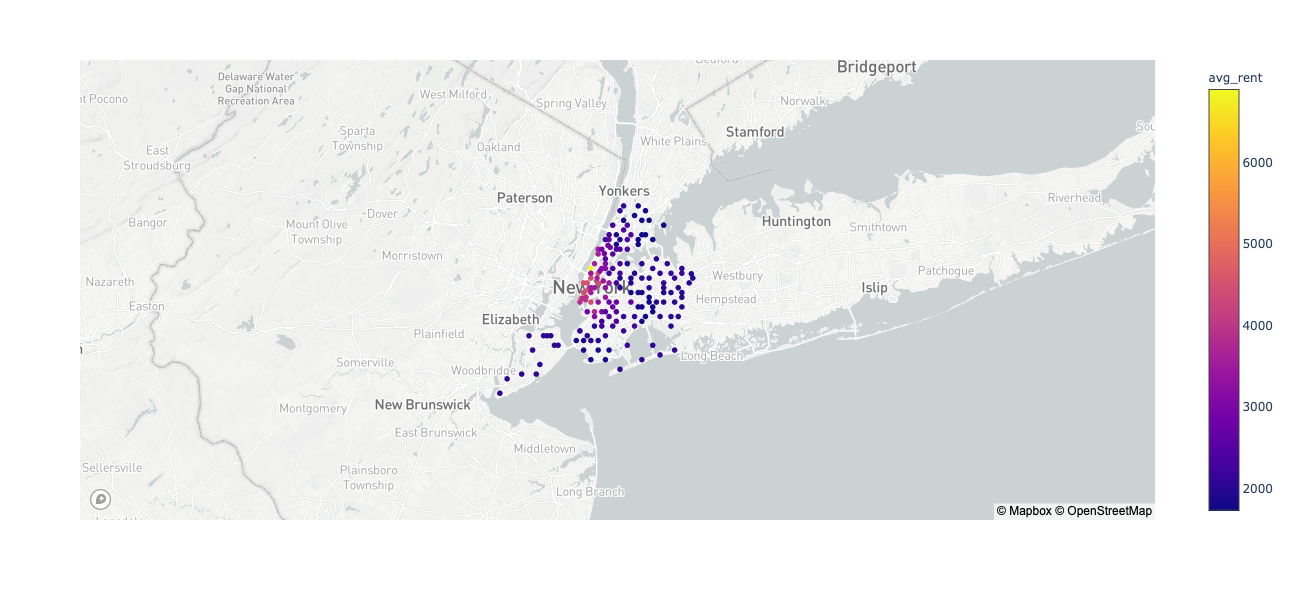

In [387]:
px.scatter_mapbox(
    data_to_plot,
    lat="latitude",
    lon="longitude",
    color="avg_rent",
)

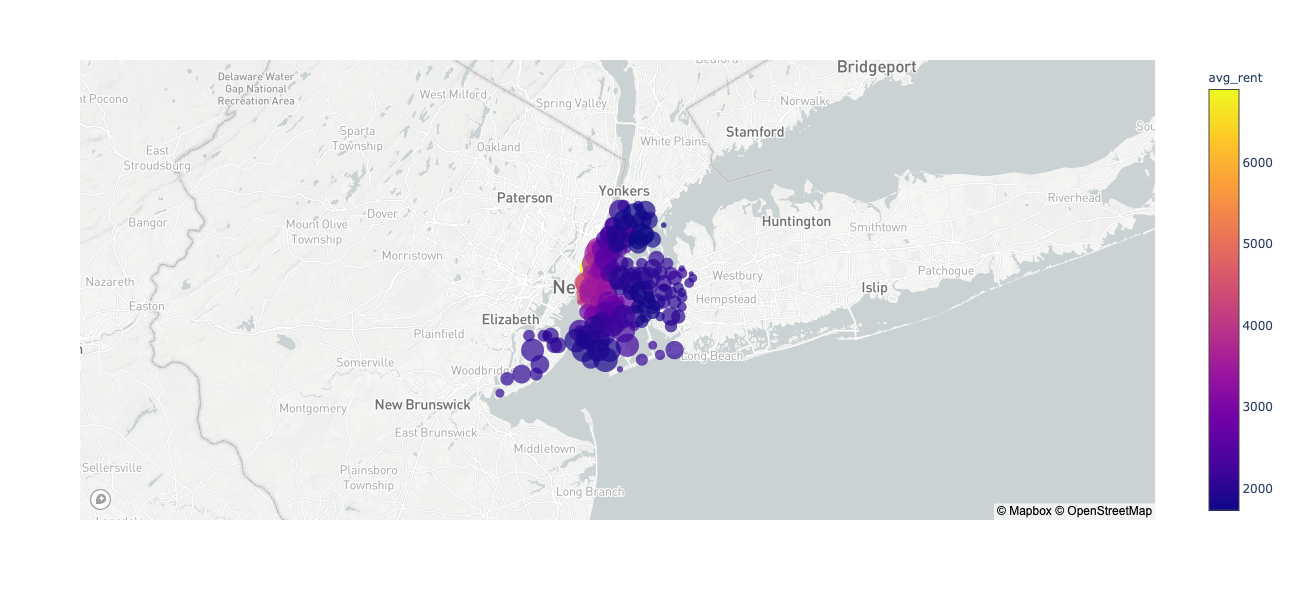

In [388]:
px.scatter_mapbox(
    data_to_plot,
    lat="latitude",
    lon="longitude",
    size="housing_units",
    color="avg_rent",
)

In [390]:
variable_name = pk.load(open('Data/airbnb/zipcode_airbnb_avg_price.pkl', 'rb'))
airbnb_zipcodes_df = pd.DataFrame(variable_name)
airbnb_zipcodes_df.reset_index(inplace=True)
airbnb_zipcodes_df.rename(columns={'zipcode_clean': "zip_code"},inplace=True)
airbnb_zipcodes_df.rename(columns={'price': "Airbnb_avg_night_price"},inplace=True)
airbnb_zipcodes_df['zip_code']=pd.to_numeric(airbnb_zipcodes_df.zip_code)

In [391]:
airbnb_zipcodes_df

,zip_code,Airbnb_avg_night_price
0,10013,428.130081
1,10282,409.200000
2,10153,369.057143
3,10167,341.183486
4,11360,338.363636
...,...,...
190,10458,62.836735
191,10459,60.166667
192,11362,56.428571
193,10474,51.200000


In [392]:
airbnb_rents_df = pd.merge(final_df, airbnb_zipcodes_df, on='zip_code', how='inner')

In [393]:
airbnb_rents_df

,zip_code,area/neighborhood,latitude,longitude,population,housing_units,med_home_value,avg_rent,Airbnb_avg_night_price
0,10019,Central_Park_South,40.770,-73.990,42870.0,31404.0,808600.0,6900.000000,228.768889
1,10007,Tribeca,40.714,-74.008,6988.0,3143.0,1000001.0,6673.000000,310.137500
2,10280,Battery_Park_City,40.707,-74.017,7853.0,4962.0,685700.0,4798.000000,205.485714
3,10022,Gramercy-Park_Murray-Hill,40.760,-73.970,31924.0,23485.0,866100.0,4523.333333,259.220930
4,10016,Gramercy-Park_Murray-Hill,40.740,-73.970,54183.0,35617.0,759600.0,4523.333333,200.963719
...,...,...,...,...,...,...,...,...,...
159,10465,Southeast_Bronx,40.830,-73.820,42230.0,16889.0,437800.0,1737.500000,98.294118
160,10464,Southeast_Bronx,40.860,-73.790,4534.0,2272.0,484000.0,1737.500000,105.500000
161,10462,Southeast_Bronx,40.840,-73.850,75784.0,31331.0,271300.0,1737.500000,76.783784
162,10461,Southeast_Bronx,40.840,-73.840,50502.0,21127.0,454700.0,1737.500000,77.733333


In [394]:
airbnb_rents_df.set_index('zip_code',inplace=True)
just_airbnb_rents_df = airbnb_rents_df[['area/neighborhood','avg_rent', 'Airbnb_avg_night_price']].copy()

In [395]:
just_airbnb_rents_df.head()


,area/neighborhood,avg_rent,Airbnb_avg_night_price
zip_code,,,
10019,Central_Park_South,6900.000000,228.768889
10007,Tribeca,6673.000000,310.137500
10280,Battery_Park_City,4798.000000,205.485714
10022,Gramercy-Park_Murray-Hill,4523.333333,259.220930
10016,Gramercy-Park_Murray-Hill,4523.333333,200.963719


In [396]:
just_airbnb_rents_df.tail()


,area/neighborhood,avg_rent,Airbnb_avg_night_price
zip_code,,,
10465,Southeast_Bronx,1737.5,98.294118
10464,Southeast_Bronx,1737.5,105.500000
10462,Southeast_Bronx,1737.5,76.783784
10461,Southeast_Bronx,1737.5,77.733333
10473,Southeast_Bronx,1737.5,98.535714


In [397]:
correlation = just_airbnb_rents_df.corr()

In [398]:
correlation

,avg_rent,Airbnb_avg_night_price
avg_rent,1.000000,0.707511
Airbnb_avg_night_price,0.707511,1.000000


In [399]:
just_airbnb_rents_df.reset_index(inplace = True)

In [403]:
scatter_plot = px.scatter(
    just_airbnb_rents_df,
    x="avg_rent",
    y="Airbnb_avg_night_price",
    hover_name="zip_code",
    hover_data=["area/neighborhood"],
    title="Avg. Rent vs. Airbnb avg night rate for all NYC Zip Codes",
)

In [414]:
scatter_plot_cluster = px.scatter(
    just_airbnb_rents_df,
    x="avg_rent",
    y="Airbnb_avg_night_price",
    range_x=[1500,3000],
    range_y=[25,250],
    hover_name="zip_code",
    hover_data=["area/neighborhood"],
    title="Cluster",
)

In [415]:
row = pn.Row(scatter_plot,scatter_plot_cluster)
row

Row
    [0] Plotly(Figure)
    [1] Plotly(Figure)

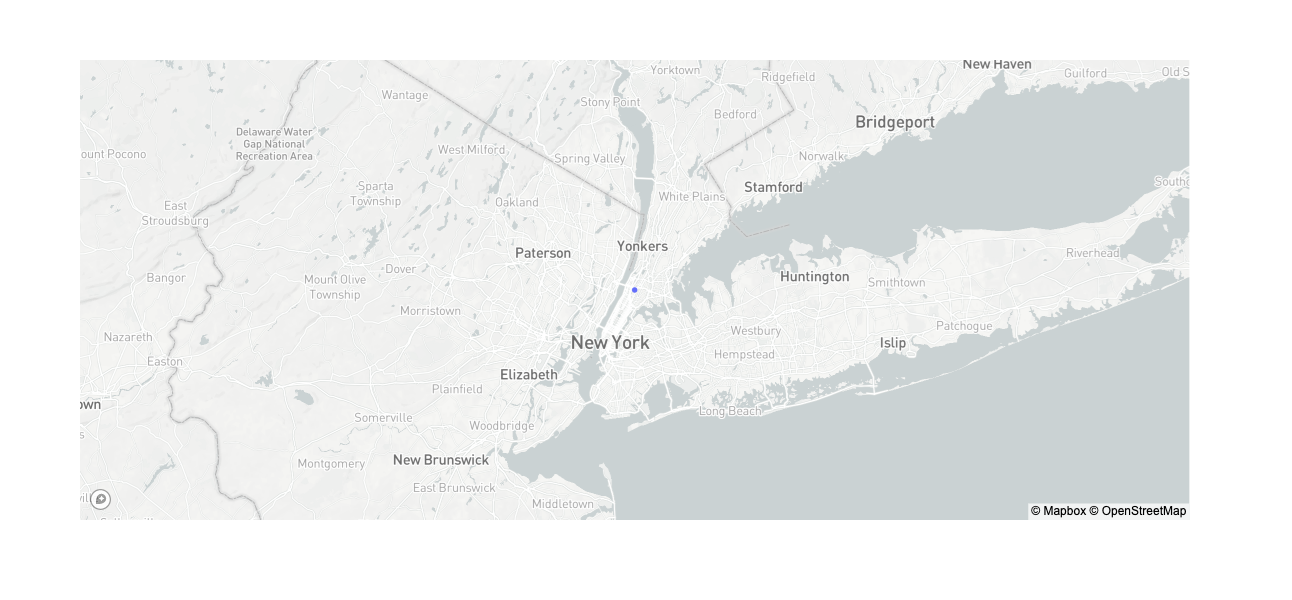

In [442]:
search = SearchEngine(simple_zipcode=True)
zipcode = search.by_zipcode(10452)
dic_aux = zipcode.to_dict()
lat = dic_aux['lat']
long = dic_aux['lng']
data = {'latitude':[lat], 'longitude':[long]} 
aux = pd.DataFrame(data)
px.scatter_mapbox(
    aux,
    lat="latitude",
    lon="longitude",
)